In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt 
import numpy as np
import csv

In [2]:
df = pd.read_csv("IoT_Devices.csv")

In [3]:
df.head()

,Packet ID,TIME,Size,eth.src,eth.dst,IP.src,IP.dst,IP.proto,port.src,port.dst,label
0,3,1474639202,156,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea,192.168.1.106,52.87.241.159,6,46330,443,Dropcam
1,4,1474639203,66,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2,52.87.241.159,192.168.1.106,6,443,46330,TPLink Router Bridge LAN (Gateway)
2,5,1474639203,140,70:5a:0f:e4:9b:c0,14:cc:20:51:33:ea,192.168.1.236,15.72.162.53,6,23596,5223,HP Printer
3,6,1474639203,66,14:cc:20:51:33:ea,70:5a:0f:e4:9b:c0,15.72.162.53,192.168.1.236,6,5223,23596,TPLink Router Bridge LAN (Gateway)
4,11,1474639203,156,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea,192.168.1.106,52.87.241.159,6,46330,443,Dropcam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735440 entries, 0 to 6735439
Data columns (total 11 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Packet ID  int64 
 1   TIME       int64 
 2   Size       int64 
 3   eth.src    object
 4   eth.dst    object
 5   IP.src     object
 6   IP.dst     object
 7   IP.proto   int64 
 8   port.src   int64 
 9   port.dst   int64 
 10  label      object
dtypes: int64(6), object(5)
memory usage: 565.3+ MB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6735432 entries, 0 to 6735439
Data columns (total 11 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Packet ID  int64 
 1   TIME       int64 
 2   Size       int64 
 3   eth.src    object
 4   eth.dst    object
 5   IP.src     object
 6   IP.dst     object
 7   IP.proto   int64 
 8   port.src   int64 
 9   port.dst   int64 
 10  label      object
dtypes: int64(6), object(5)
memory usage: 616.6+ MB


In [7]:
df['port.dst'].value_counts()

443      1616929
47940     500538
80        416965
60757     224772
40767     216910
          ...   
17719          1
17718          1
17717          1
17716          1
61415          1
Name: port.dst, Length: 65535, dtype: int64

In [8]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['eth.src', 'eth.dst', 'IP.src', 'IP.dst', 'label'], dtype='object')


In [9]:
L = LabelEncoder()
for feat in objList:
    df[feat] = L.fit_transform(df[feat].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6735432 entries, 0 to 6735439
Data columns (total 11 columns):
 #   Column     Dtype
---  ------     -----
 0   Packet ID  int64
 1   TIME       int64
 2   Size       int64
 3   eth.src    int32
 4   eth.dst    int32
 5   IP.src     int32
 6   IP.dst     int32
 7   IP.proto   int64
 8   port.src   int64
 9   port.dst   int64
 10  label      int32
dtypes: int32(5), int64(6)
memory usage: 488.2 MB
None


In [10]:
df['label'].value_counts()


20    2910574
5      970569
10     417435
16     377894
0      316410
3      291276
8      223755
2      221522
24     196010
18     154803
12     140143
17     120268
15     118368
23     106880
21      36924
13      36115
9       26128
14      24163
26      16489
6       12830
19      11260
1        2485
25       1362
11       1039
7         361
22        315
4          54
Name: label, dtype: int64

In [11]:
X = df.drop(['label','Packet ID','TIME','IP.proto','IP.src','port.dst'],axis=1)

In [12]:
X.head()

,Size,eth.src,eth.dst,IP.dst,port.src
0,156,9,9,1244,46330
1,66,6,12,570,443
2,140,13,9,293,23596
3,66,6,16,588,5223
4,156,9,9,1244,46330


In [13]:
Y=df['label']

In [14]:
Y.head()

0     5
1    20
2     6
3    20
4     5
Name: label, dtype: int32

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()


In [18]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [19]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 5)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators =5).fit(X_train, Y_train)



In [22]:
Y_pred = rf_model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
Cmat = confusion_matrix(Y_test, Y_pred)

In [25]:
print(Cmat)

[[ 58684     39      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0   4371
       0      0      0      0      0      0      0]
 [    28    454      0      0      0      4      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42226     14      0      0      0      0      0      0
       0      0      0      0   2037      0      0      0      2      0
       0      0      0      0      0      0      0]
 [     0      0   3473  29699      0      0      0      0      0      0
       0      0      0      0  25141      0      0      0      1      0
       0      0      0      0      0      0      0]
 [     0      1      1      0      9      0      0      0      0      0
       0      0      3      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1  41419     

In [26]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, Y_pred))

ACCURACY OF THE MODEL:  0.9250545807360623


In [27]:
from sklearn.metrics import roc_curve, auc, classification_report
print(classification_report(Y_test, Y_pred)) #labels=np.unique(Y_pred)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     63094
           1       0.01      0.93      0.02       486
           2       0.84      0.95      0.89     44279
           3       1.00      0.51      0.67     58314
           4       1.00      0.64      0.78        14
           5       1.00      0.79      0.88    193822
           6       0.96      1.00      0.98      2633
           7       0.23      0.96      0.37        52
           8       1.00      0.80      0.89     44819
           9       0.68      0.88      0.77      5244
          10       0.95      0.97      0.96     83492
          11       0.96      0.93      0.94       215
          12       0.94      1.00      0.97     28041
          13       1.00      0.20      0.33      7152
          14       0.15      0.97      0.25      4819
          15       0.78      0.99      0.87     23937
          16       0.99      1.00      0.99     75668
          17       1.00    

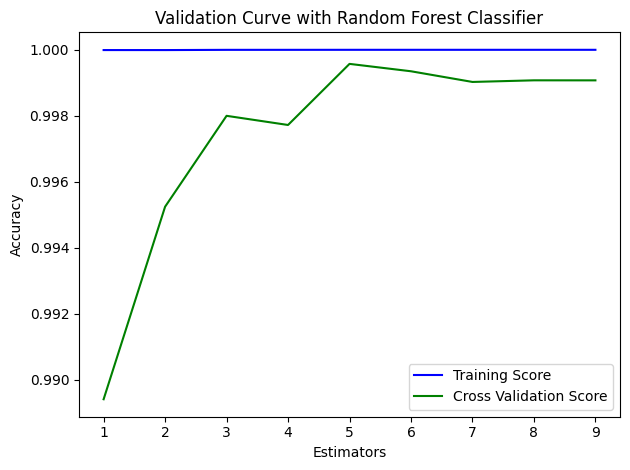

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve


parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(RandomForestClassifier(n_estimators =5), X, Y,
									param_name = "n_estimators",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
	label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with Random Forest Classifier")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()